## Kalman Filter
This is a Kalman Filter for the case of a simple pendulum rotating about the horizontal axis. Its aim is to converge to the value of angular velocity without actually differentiating the angular displacement with respect to time. Some simplifications have been made: Torque as well as the process and the measurement noise matrices are all taken as 0.

In [ ]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The state equation is as follows:
\begin{gather}
 \begin{bmatrix} \theta \\ \theta ' \end{bmatrix}
 =
  \begin{bmatrix}
   1 &
   \Delta t \\
   0 &
   1 
   \end{bmatrix}
   \begin{bmatrix}
    \theta \\
    \theta '
   \end{bmatrix}+
   \begin{bmatrix}
    \frac{\Delta t^2}{2ml^2} \\
    \frac{\Delta t}{ml^2}
   \end{bmatrix} T + w_k
\end{gather}

This, after discretization, gives us the update equations. T was taken as 0 since its coefficient matrix was turning out to be difficult to convert using the rules. Hence, the update equation is:

\begin{gather}
 \begin{bmatrix} \theta_{k} \\ \theta _{k}' \end{bmatrix}
 =
  \begin{bmatrix}
   cos(\sqrt{\frac{g}{l}}t) &
   -\sqrt{\frac{g}{l}}sin(\sqrt{\frac{g}{l}}t) \\
   \sqrt{\frac{l}{g}}sin(\sqrt{\frac{g}{l}}t) &
   cos(\sqrt{\frac{g}{l}}t) 
   \end{bmatrix}
   \begin{bmatrix} \theta_{k-1} \\ \theta _{k-1}' 
   \end{bmatrix}+
    w_k
\end{gather}




In [ ]:
#declaring the constants
length=1.0
g=9.81
time_step=0.5
iter=100
A=np.array([[np.cos(np.sqrt(g/length)*time_step),-np.sqrt(g/length)*np.sin(np.sqrt(g/length)*time_step)],[np.sqrt(length)*np.sin(np.sqrt(g/length)*time_step),np.cos(np.sqrt(g/length)*time_step)]])
C=np.array([[1,0],[0,1]])
H=np.array([[1,0],[0,1]])
B=np.array([0,0])[np.newaxis].T

New predicted state: \\
$X_{kp}=AX_k+Bu_k+w_k$

In [ ]:
#function that calculates predicted estimate
def pred_state(x,u):
  x_pred= np.dot(A,x)+np.dot(B,u)  #need to learn how to model process noise
  return x_pred

Measured value: \\
$Y_k=CY_{km}+z_m$ \\

In [ ]:
#function that calculates measured value
def measure(y):
  yk=np.dot(C,y) #need to learn how to model measurement noise
  return yk

Predicted Covariance: \\
$P_{kp}=AP_kA^T+Q_k$ \\

In [ ]:
#function that calculates predicted covariance
def pred_cov(P):
  p_pred=np.dot(np.dot(A,P),(A.T))  #need to learn how to model process covariance
  return p_pred

Kalman Gain: \\
$K= \frac{P_{kp}H^T}{HP_{kp}H^T+R}$

In [ ]:
#function that calculates Kalman Gain
def kal_gain(P,R):
  K=np.dot(np.dot(P,H.T),(np.linalg.inv(np.dot(np.dot(H,P),H.T)+R)))
  return K

New Estimate: \\
$X_{k+1}=X_{kp}+K[Y-HX_{kp}]$

In [ ]:
#function that calculates new estimate
def new_est(x,K,y):
  x_new=x+np.dot(K,(y-np.dot(H,x)))
  return x_new

New Covariance: \\
$P_{k+1}=(I-KH)P_{kp}$

In [ ]:
#function that calculates new covriance
def new_cov(I,K,P):
  P_new=np.dot((I-np.dot(K,H)),P)
  return P_new

Initial input is always required and can't be automated, hence we take input for the initial state matrix as well as the associated covariance. $\xi_1$ and $\xi_2$ are considered to be independent of each other, hence the covariance terms are taken as 0.

In [ ]:
#declaring the variables
init_state=np.zeros(shape=(2,1))
init_cov=np.zeros(shape=(2,2))
#initial state vector input
chi_1=float(input())
chi_2=float(input())
var_chi1=float(input())
var_chi2=float(input())
init_state[0][0]=chi_1
init_state[1][0]=chi_2
init_cov[0][0]=var_chi1
init_cov[1][1]=var_chi2
init_cov[0][1]=0
init_cov[1][0]=0

5
10
1
1


In [ ]:
error=[]
X=init_state
P=init_cov
for i in range(iter):
  x_pred=pred_state(X,0)
  p_pred=pred_cov(P)
  #measured values are modeled as the predicted values + noise, making the process fully automated
  meas=x_pred+5*np.random.rand(2,1)
  R=p_pred+5*np.random.rand(2,2)
  y_k=measure(meas)
  K=kal_gain(p_pred,R)
  X=new_est(x_pred,K,y_k)
  P=new_cov(np.array([[1,0],[0,1]]),K,p_pred)
  error.append(np.dot((X-x_pred).T,(X-x_pred)))
  #here, we can store the values in an array for final plotting
print(X)
print(P)
print(error)

[[5.56264357e+25]
 [5.29938070e+25]]
[[8.59245264e+19 1.98109645e+19]
 [1.11795479e+19 3.93697162e+19]]
[array([[0.00237425]]), array([[3.21359622]]), array([[0.47969521]]), array([[3.26683085]]), array([[0.50504736]]), array([[10.80621097]]), array([[3.47655282]]), array([[2.44346916]]), array([[1.91274806]]), array([[3.20878335]]), array([[6.02702728]]), array([[0.75794048]]), array([[11.10616873]]), array([[0.0641835]]), array([[5.30451756]]), array([[4.79304547]]), array([[1.35859736]]), array([[3.60197493]]), array([[2.1984167]]), array([[5.89602081]]), array([[0.51645776]]), array([[0.27246352]]), array([[0.69356075]]), array([[4.53811313]]), array([[2.40784045]]), array([[5.14401864]]), array([[8.53612464]]), array([[5.38699678]]), array([[11.04656226]]), array([[0.42685132]]), array([[3.82718029]]), array([[4.19039114]]), array([[2.00851231]]), array([[2.32023548]]), array([[9.02645238]]), array([[1.84198402]]), array([[2.01839879]]), array([[3.47784306]]), array([[3.76656314]]

Things left to do: \\
1) Realistic values to check if the final outputs are fine \\
2) Plotting to visualize convergence

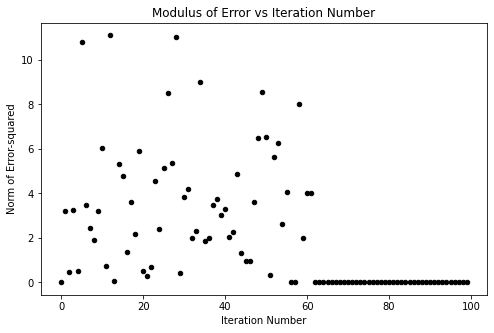

In [ ]:
x=range(100)
plt.figure(figsize=(8,5))
plt.title("Modulus of Error vs Iteration Number")
plt.xlabel("Iteration Number")
plt.ylabel("Norm of Error-squared")
plt.scatter(x,error,s=20,c='black')